AIM #1: Loading the dataset and printing basic information 
1. Import the Titanic dataset using pandas
2. Create a Dataframe from the dataset
3. Print the first 10 rows of the dataset
4. Print the last 20 rows of the dataset
5. Print dataset's information
6. Describe the dataset
7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines

In [33]:
import pandas as pd

data = pd.read_csv('titanic.csv')

df = pd.DataFrame(data)

print(df.head(10))

print(df.tail(20))

print(df.info())

print(df.describe())

pd.set_option('display.expand_frame_repr', False)

   PassengerId Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1        0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171     7.25   NaN        S
1            2        1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833   C85        C
2            3        1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282    7.925   NaN        S
3            4        1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803     53.1  C123        S
4            5        0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450     8.05   NaN        S
5            6        0       3                                   Moran, Mr. James

AIM #2: Finding issues (empty, NAs, incorrect value, incorrect format, outliers, etc.) 
1. Find out how many missing values there are in the dataset
2. For the 'Age' column, find the best way to handle the missing values
    2.1. Use an appropriate plot to study the nature of the 'Age' column
    2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
    2.3. Using the most suitable central tendency measure, fill the missing values in the age column
3. Decide what is the best way to handle the missing values in the 'Cabin' columns
4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
5. Handle the incorrect data under the 'Survived' columns using appropriate measure
6. Handle the incorrectly formatted data under the 'Fare' column


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


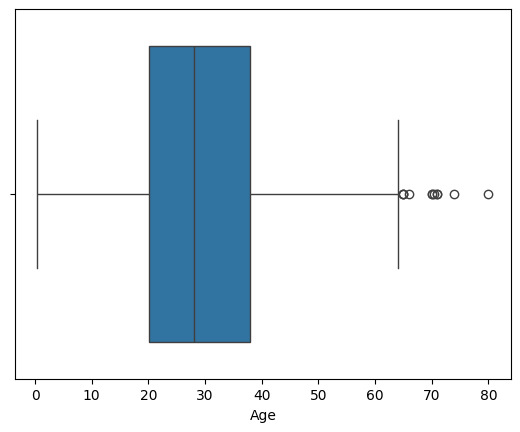

   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500        S
1            2         0       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833        C
2            3         0       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250        S
3            4         0       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000        S
4            5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500        S


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('titanic.csv')

missing_values = data.isnull().sum()
print(missing_values)

sns.boxplot(x = data['Age'])
plt.show()

age_mean = data['Age'].mean()
age_median = data['Age'].median()
age_mode = data['Age'].mode()

data['Age'].fillna(age_median, inplace=True)

data.drop('Cabin', axis=1, inplace=True)

data['Embarked'].fillna(data['Embarked'].mode(), inplace=True)

data['Survived'] = data['Survived'].apply(lambda x: 1 if x == 1 else 0)

data['Fare'] = data['Fare'].str.replace('$', '', regex=True).astype(float)

print(data.head())

AIM #3: Grouping 
1. Find out the average fare grouped by Pclass
    1.1. Plot the above using a suitable plot
2. Find out the average fare grouped by Sex
    2.1. Plot the above using a suitable plot

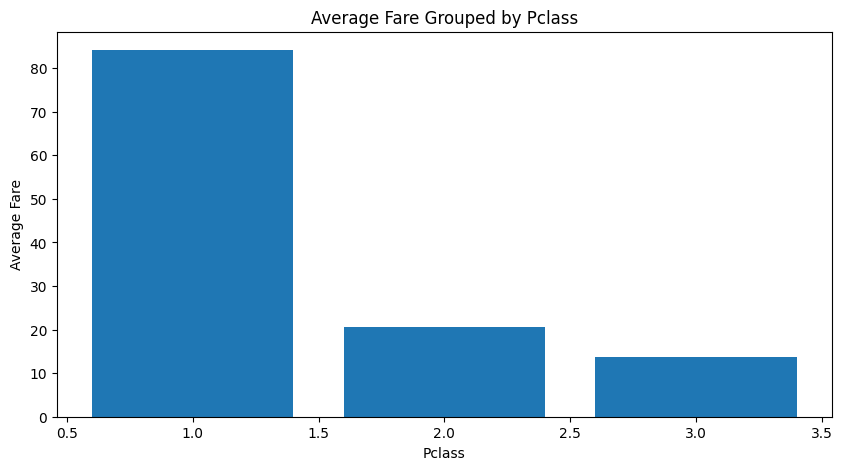

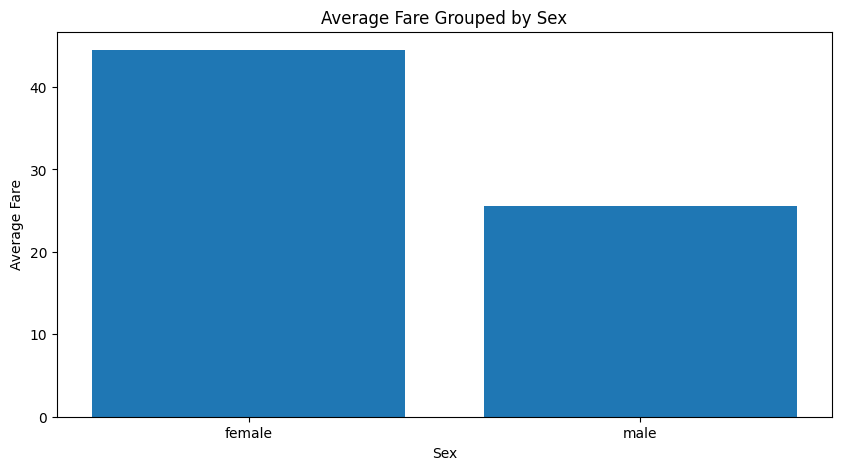

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('titanic.csv')

data['Fare'] = data['Fare'].str.replace('$', '', regex=True).astype(float)

average_fare_by_pclass = data.groupby('Pclass')['Fare'].mean()

plt.figure(figsize=(10, 5))
plt.bar(average_fare_by_pclass.index, average_fare_by_pclass)
plt.title('Average Fare Grouped by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Average Fare')
plt.show()

average_fare_by_sex = data.groupby('Sex')['Fare'].mean()

plt.figure(figsize=(10, 5))
plt.bar(average_fare_by_sex.index, average_fare_by_sex)
plt.title('Average Fare Grouped by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Fare')
plt.show()

AIM #4: Dataset visualization using pandas

1. Plot the distribution of 'Age' using a suitable plot
2. Plot the distribution of 'Fare' using a suitable plot
3. Plot the distribution of 'Pclass' using a suitable plot
4. Plot the distribution of 'Survived' using a suitable plot
5. Plot the distribution of 'Embarked' using a suitable plot
6. Plot the distribution of 'Fare' grouped by 'Survived'
7. Plot the distribution of 'Fare' grouped by 'Pclass'
8. Plot the distribution of 'Age' grouped by 'Survived'
9. Plot the distribution of 'Age' grouped by 'PClass'
10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
13. Are there any other possibilities to show relationships?

<Figure size 1000x500 with 0 Axes>

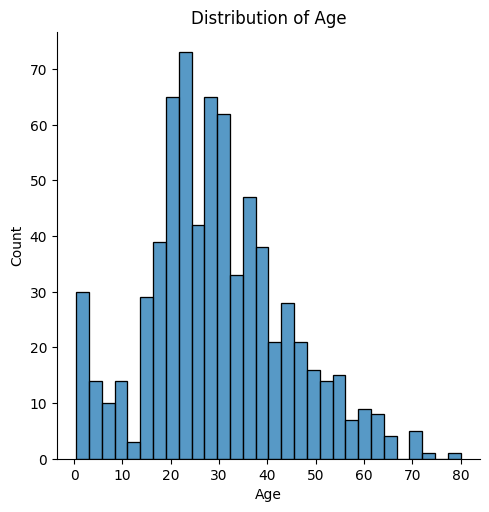

<Figure size 1000x500 with 0 Axes>

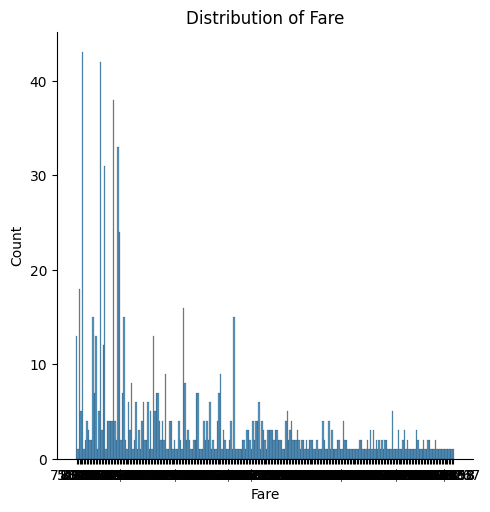

<Figure size 1000x500 with 0 Axes>

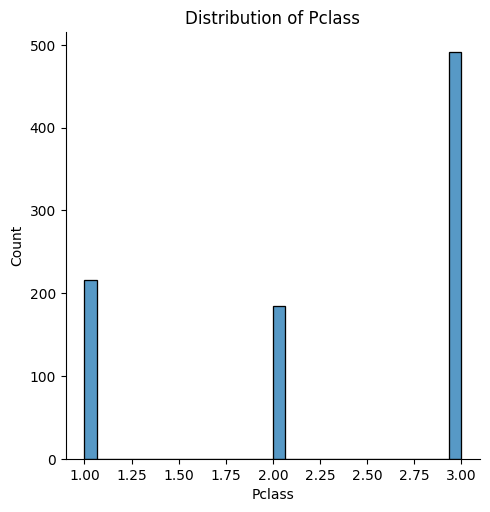

<Figure size 1000x500 with 0 Axes>

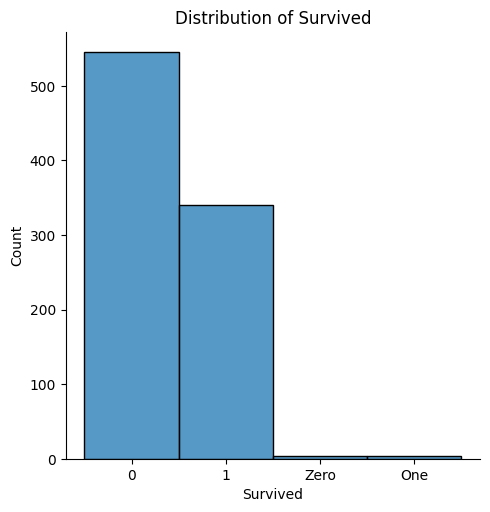

<Figure size 1000x500 with 0 Axes>

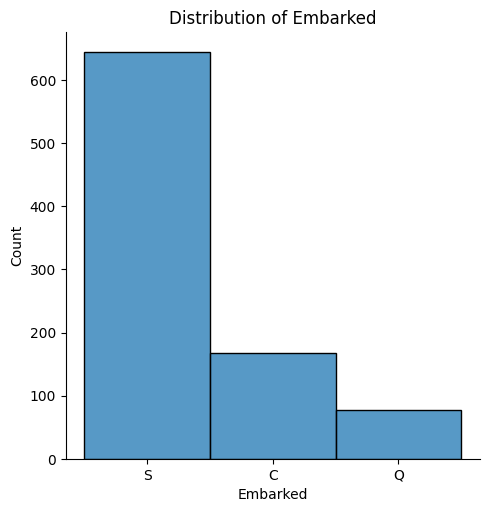

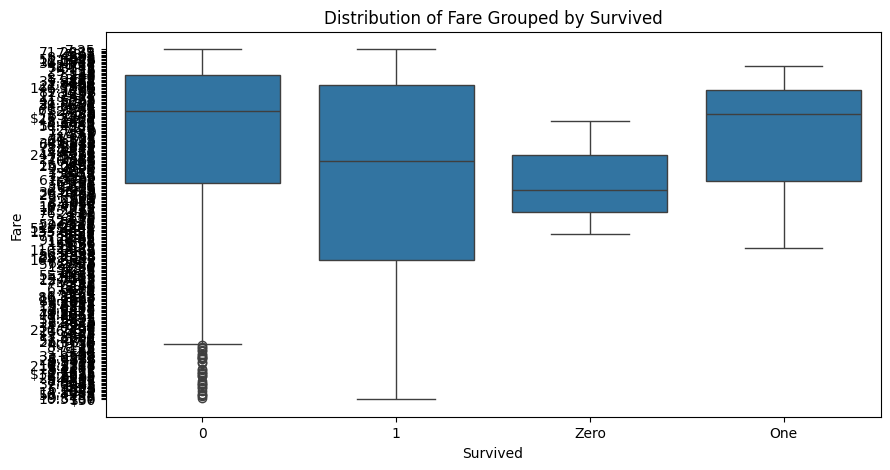

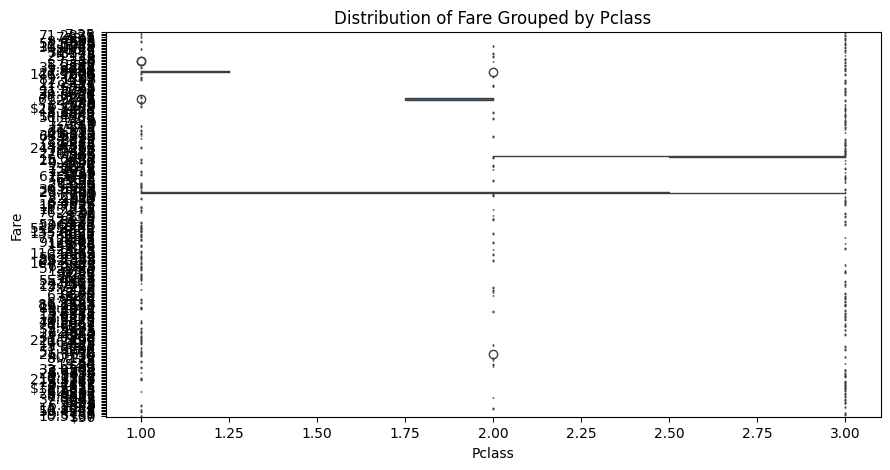

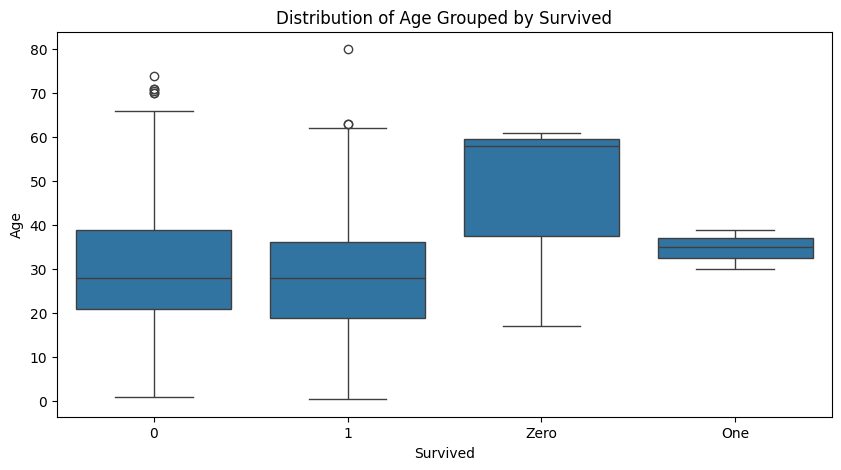

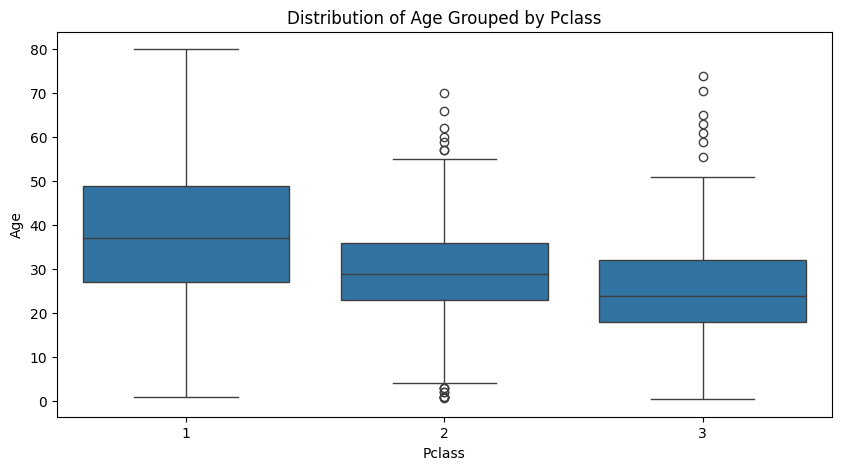

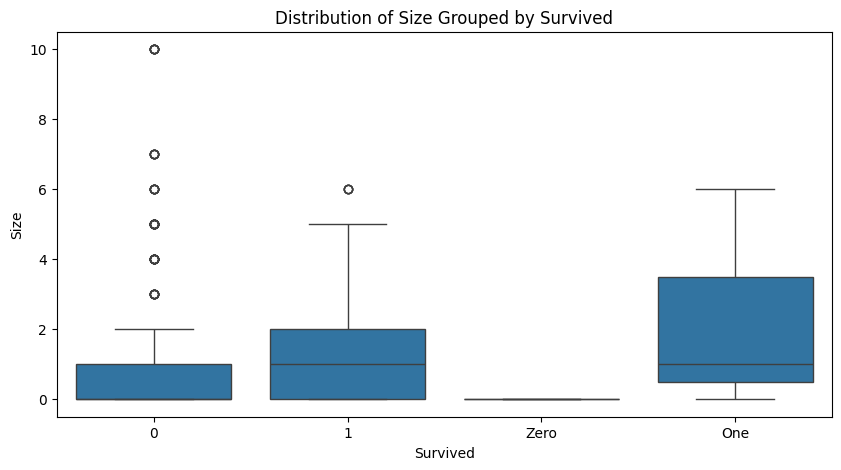

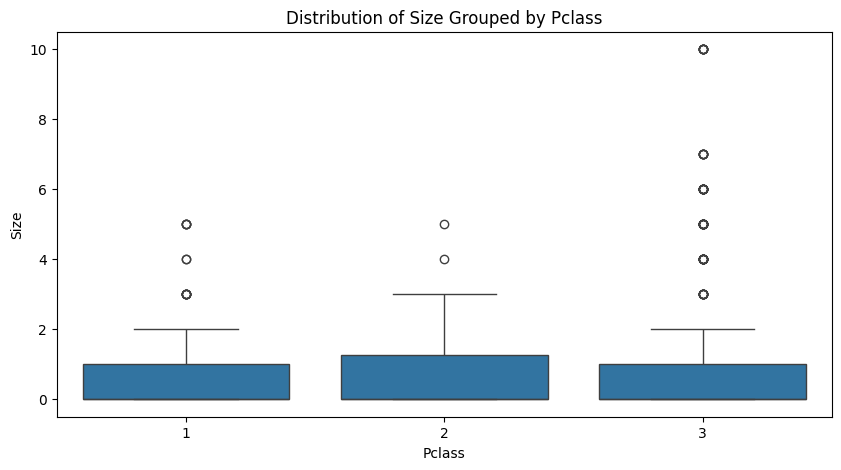

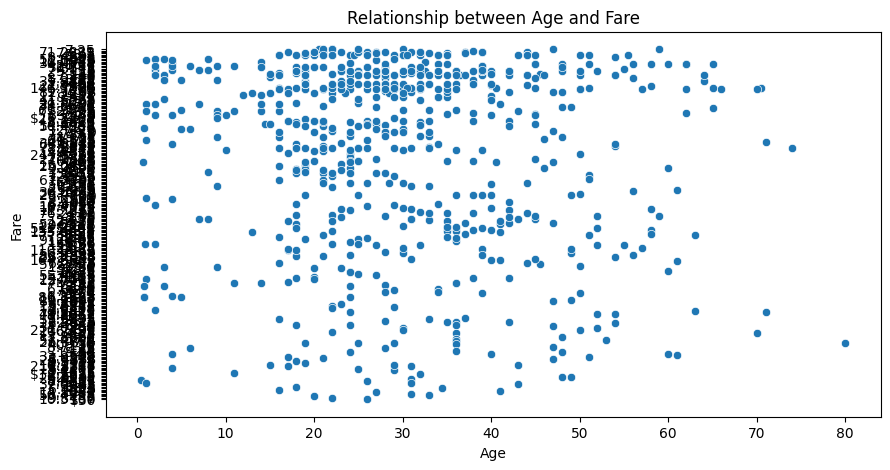

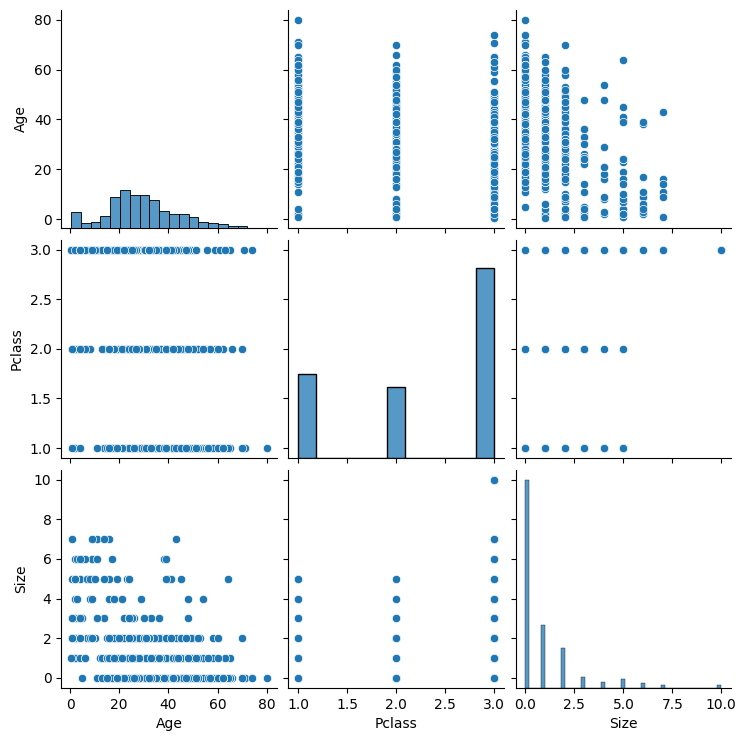

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('titanic.csv')

plt.figure(figsize=(10, 5))
sns.displot(data['Age'], bins=30)
plt.title('Distribution of Age')
plt.show()

plt.figure(figsize=(10, 5))
sns.displot(data['Fare'], bins=30)
plt.title('Distribution of Fare')
plt.show()

plt.figure(figsize=(10, 5))
sns.displot(data['Pclass'], bins=30)
plt.title('Distribution of Pclass')
plt.show()

plt.figure(figsize=(10, 5))
sns.displot(data['Survived'], bins=30)
plt.title('Distribution of Survived')
plt.show()

plt.figure(figsize=(10, 5))
sns.displot(data['Embarked'], bins=30)
plt.title('Distribution of Embarked')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='Survived', y='Fare', data=data)
plt.title('Distribution of Fare Grouped by Survived')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='Pclass', y='Fare', data=data)
plt.title('Distribution of Fare Grouped by Pclass')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='Survived', y='Age', data=data)
plt.title('Distribution of Age Grouped by Survived')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='Pclass', y='Age', data=data)
plt.title('Distribution of Age Grouped by Pclass')
plt.show()

data['Size'] = data['SibSp'] + data['Parch']
plt.figure(figsize=(10, 5))
sns.boxplot(x='Survived', y='Size', data=data)
plt.title('Distribution of Size Grouped by Survived')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='Pclass', y='Size', data=data)
plt.title('Distribution of Size Grouped by Pclass')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x='Age', y='Fare', data=data)
plt.title('Relationship between Age and Fare')
plt.show()

sns.pairplot(data[['Age', 'Fare', 'Pclass', 'Survived', 'Embarked', 'Size']])
plt.show()

AIM #5: Correlation

1. Generate a correlation matrix for the entire dataset
2. Find correlation between 'Age' and 'Fare'
3. What other possible correlations can be found in the dataset?

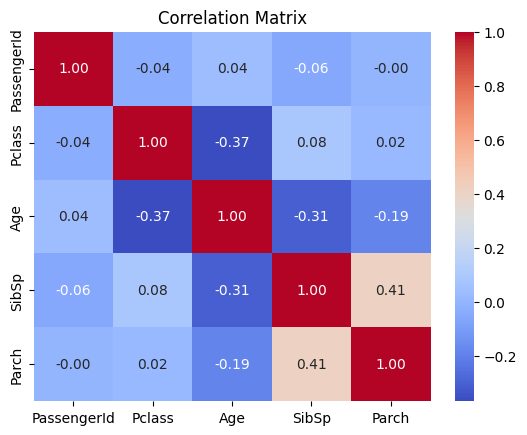

relationship between Age and Fare: 0.10


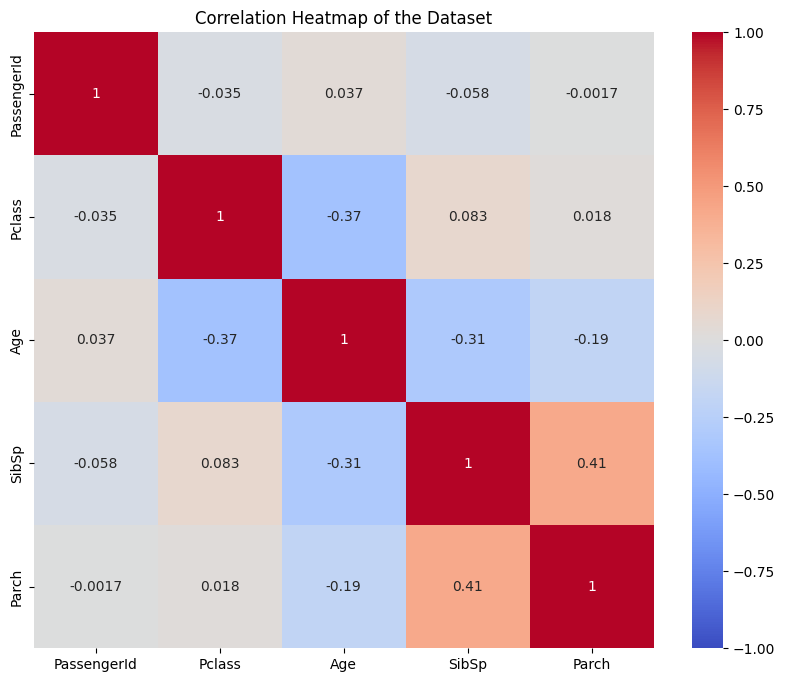

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('titanic.csv')

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

data['Fare'] = data['Fare'].str.replace('$', '', regex=True).astype(float)

age_fare_corr = data['Age'].corr(data['Fare'])
print(f"relationship between Age and Fare: {age_fare_corr:.2f}")

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of the Dataset")
plt.show()